# Trabalho em grupo

Instruções importantes:

* Façam uma cópia deste notebook e **enviem o link** dele respondido no sistema.
* Incluam no notebook o nome de todos os integrantes do grupo, assim como está no sistema da impacta
* O trabalho é para ser feito em grupo de 3 a 5 pessoas
* Todas as respostas devem apresentar o código que foi utilizado.
* A resposta deve ser contida no espaço abaixo da pergunta a que se refere e a cima das perguntas seguintes. **Organização importa**
* Só uma pessoa do grupo deve enviar o trabalho.
* Prazo para o trabalho está no sistema
* Qualquer dúvida estou a disposição :D

## Primeiro passo

Baixe o dataset com o comando a baixo e extraia os dados importantes. Responda as questão abaixo com os dados do csv bank-full.csv

In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2025-04-15 00:18:03--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  2.95MB/s    in 0.3s    

2025-04-15 00:18:04 (2.95 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [2]:
!unzip bank+marketing.zip -d training_data

!unzip training_data/bank.zip -d training_data

Archive:  bank+marketing.zip
 extracting: training_data/bank.zip  
 extracting: training_data/bank-additional.zip  
Archive:  training_data/bank.zip
  inflating: training_data/bank-full.csv  
  inflating: training_data/bank-names.txt  
  inflating: training_data/bank.csv  


In [3]:
import pandas as pd

# Caminho correto do CSV extraído
df = pd.read_csv("training_data/bank-full.csv", sep=';')

# Validar para Saber se está funcionando
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Questão 1

Qual a moda matemática da coluna "education"?

In [4]:
import pandas as pd

# Calculando a moda
moda = df['education'].mode()

print("A moda da coluna education é:", moda.tolist())

A moda da coluna education é: ['secondary']


## Questão 2

Separe o dataset em treino, validação e teste, utilizando a função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Sendo 60% do dataset para treino, 20% para validação e 20% para teste

Obs: O conjunto de validação deve vir do de treino, se não tiver sido especificado

In [ ]:
from sklearn.model_selection import train_test_split



X = df.drop('y', axis=1)
y = df['y']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

# tamanhos
print(f"Treino: {len(X_train)} amostras")
print(f"Validação: {len(X_val)} amostras")
print(f"Teste: {len(X_test)} amostras")


Treino: 27126 amostras
Validação: 9042 amostras
Teste: 9043 amostras


## Questão 3

Crie uma [matrix de correlaçao](https://www.google.com/search?q=correlation+matrix) e responda quais são as colunas com válores números continuos com maior correlação?

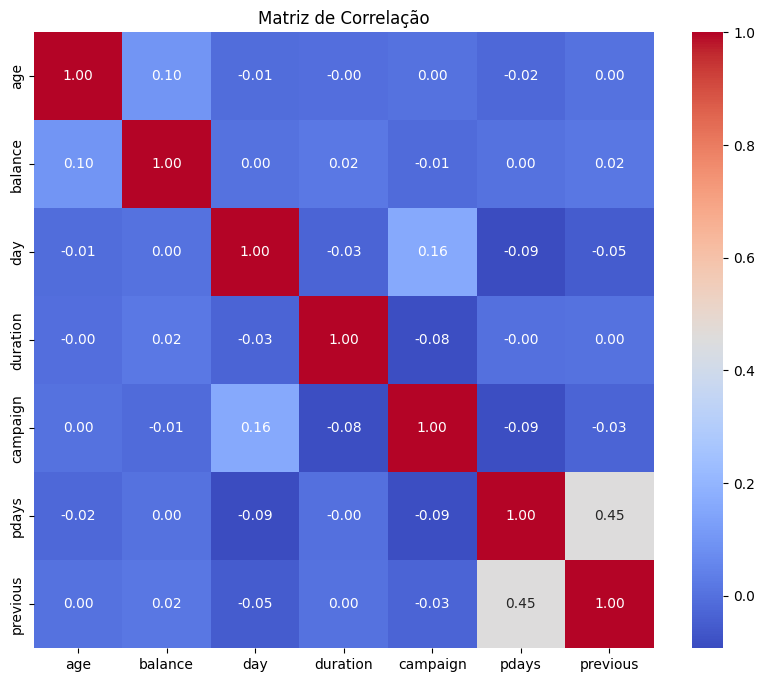

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


In [ ]:
correlation_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]

# Top 5
top_correlated = correlation_pairs.drop_duplicates().head(5)
print("Top 5 correlações entre colunas numéricas contínuas:")
print(top_correlated)


Top 5 correlações entre colunas numéricas contínuas:
pdays    previous    0.454820
day      campaign    0.162490
balance  age         0.097783
pdays    day         0.093044
         campaign    0.088628
dtype: float64


## Questão 4

Agora treine um modelo de regressão logística, apenas com as variáveis numéricas e mostre a accurácia para o conjunto de treino e validação.

In [ ]:
X_numeric = df.select_dtypes(include=['int64', 'float64']).drop(columns='y', errors='ignore')
y = df['y'].map({'yes': 1, 'no': 0})

from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X_numeric, y, test_size=0.4, random_state=42, stratify=y)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


train_acc = accuracy_score(y_train, model.predict(X_train))
val_acc = accuracy_score(y_val, model.predict(X_val))

print(f"Acurácia no treino: {train_acc:.4f}")
print(f"Acurácia na validação: {val_acc:.4f}")


Acurácia no treino: 0.8898
Acurácia na validação: 0.8891


## Questão 5

Faça o mesmo da questão 4, agora para um modelo de árvore de decisão

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Criar e treinar o modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Previsões
y_train_pred_tree = tree_model.predict(X_train)
y_val_pred_tree = tree_model.predict(X_val)

# Acurácias
acc_train_tree = accuracy_score(y_train, y_train_pred_tree)
acc_val_tree = accuracy_score(y_val, y_val_pred_tree)

print(f"Acurácia no treino (Árvore): {acc_train_tree:.4f}")
print(f"Acurácia na validação (Árvore): {acc_val_tree:.4f}")

Acurácia no treino (Árvore): 1.0000
Acurácia na validação (Árvore): 0.8448


## Questão 6

Por fim, use o modelo de [random forrest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e responda as mesmas perguntas que na questão 4

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Previsões
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Acurácias
acc_train_rf = accuracy_score(y_train, y_train_pred_rf)
acc_val_rf = accuracy_score(y_val, y_val_pred_rf)

print(f"Acurácia no treino (Random Forest): {acc_train_rf:.4f}")
print(f"Acurácia na validação (Random Forest): {acc_val_rf:.4f}")


Acurácia no treino (Random Forest): 0.9999
Acurácia na validação (Random Forest): 0.8926


## Questão 7

Treine o modelo de regressão logística mais uma vez, mas desta vez use a cross validação com [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), cv=5. Qual o resultado médio? Quais são os coeficientes aprendidos pelo melhor modelo de regressão logística?

In [9]:

import pandas as pd

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import numpy as np

model = LogisticRegression(max_iter=1000)

results = cross_validate(model, X_train_val, y_train_val, cv=5, return_estimator=True, scoring='accuracy')
mean_accuracy = np.mean(results['test_score'])

print(f"Acurácia média com cross-validation (cv=5): {mean_accuracy:.4f}")

best_idx = np.argmax(results['test_score'])
best_model = results['estimator'][best_idx]

for name, coef in zip(X_train_val.columns, best_model.coef_[0]):
    print(f"{name}: {coef:.4f}")


Acurácia média com cross-validation (cv=5): 0.8893
age: 0.0061
balance: 0.0000
day: -0.0009
duration: 0.0037
campaign: -0.1196
pdays: 0.0021
previous: 0.0792


## Questão 8

Calcule [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) para os 3 modelos no conjunto de validação utilizando as funções do scikit learn

In [10]:

from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

from sklearn.metrics import precision_score, recall_score

modelos = {
    "Regressão Logística": logreg_model,
    "Árvore de Decisão": tree_model,
    "Random Forest": rf_model
}

for nome, modelo in modelos.items():
    y_pred = modelo.predict(X_val)
    precision = precision_score(y_val, y_pred, pos_label=1)
    recall = recall_score(y_val, y_pred, pos_label=1)
    print(f"{nome}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}\n")


Regressão Logística:
  Precision: 0.5890
  Recall:    0.1720

Árvore de Decisão:
  Precision: 0.3564
  Recall:    0.4045

Random Forest:
  Precision: 0.5749
  Recall:    0.3157



## Questão 9

Calcule, acurácia, precisão e recall para os três modelos no conjunto de validação, mas desta vez crie funções para calcular cada uma das métricas

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Funções para cada métrica
def calc_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def calc_precision(y_true, y_pred):
    return precision_score(y_true, y_pred, pos_label=1)

def calc_recall(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=1)

# Aplicando nos três modelos
for nome, modelo in modelos.items():
    y_pred = modelo.predict(X_val)
    acc = calc_accuracy(y_val, y_pred)
    prec = calc_precision(y_val, y_pred)
    rec = calc_recall(y_val, y_pred)

    print(f"{nome}:")
    print(f"  Acurácia:  {acc:.4f}")
    print(f"  Precisão:  {prec:.4f}")
    print(f"  Recall:    {rec:.4f}\n")


Regressão Logística:
  Acurácia:  0.8891
  Precisão:  0.5890
  Recall:    0.1720

Árvore de Decisão:
  Acurácia:  0.8448
  Precisão:  0.3564
  Recall:    0.4045

Random Forest:
  Acurácia:  0.8926
  Precisão:  0.5749
  Recall:    0.3157



## Questão 10

Plote agora a matrix de confusão para cada um dos modelos, utilizando os dados de validação e diga qual dos modelos escolheria para botar em produção e porque. Por fim, plote a matrix de confusão para o resultado no conjunto de teste do modelo que foi escolhido como o melhor e descorra brevemente sobre os resultados

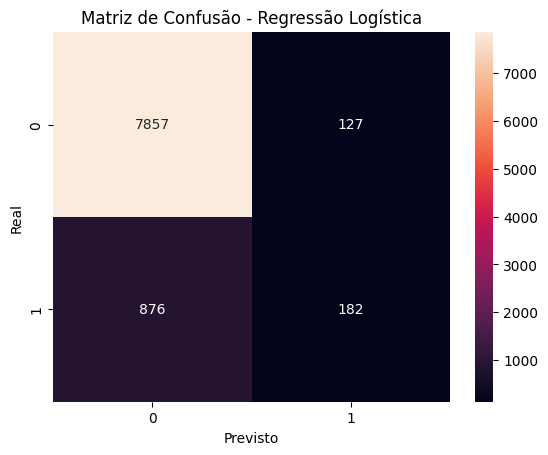

A alta acurácia sugere que o modelo está fazendo um bom trabalho ao prever a classe negativa, que tem muito mais casos.
No entanto, a precisão e o recall da classe positiva estão bastante baixos, indicando que o modelo é menos eficaz 
 em identificar casos positivos.


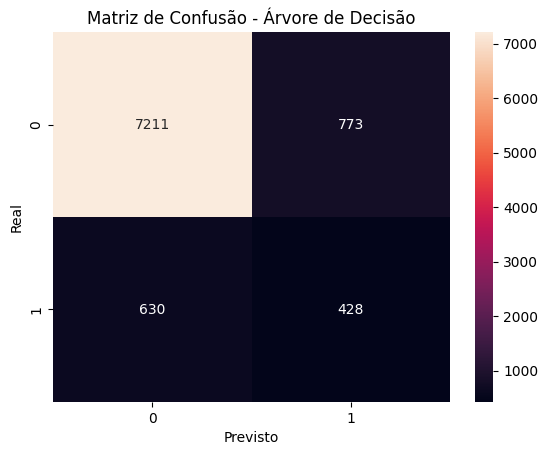

A acurácia é um pouco alta, mas tanto a precisão quanto o recall são baixos, indicando dificuldades em prever 
 corretamente a classe positiva.
Por ter o maior recall e entendendo que é crucial identificar os casos positivos, escolhemos o modelo de arvore 
 de decisão como o melhor modelo para esse cenário. 


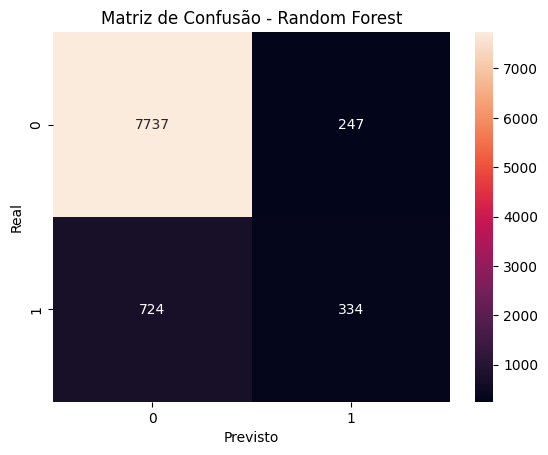

A acurácia é boa e o modelo tem uma precisão razoável. Porém, o recall indica que muitos casos positivos são perdidos.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X, y, model_name):
    cm = confusion_matrix(y, model.predict(X))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()

plot_confusion_matrix(logreg_model, X_val, y_val, "Regressão Logística")
print("A alta acurácia sugere que o modelo está fazendo um bom trabalho ao prever a classe negativa, que tem muito mais casos.")
print("No entanto, a precisão e o recall da classe positiva estão bastante baixos, indicando que o modelo é menos eficaz \n em identificar casos positivos.")
plot_confusion_matrix(tree_model, X_val, y_val, "Árvore de Decisão")
print("A acurácia é um pouco alta, mas tanto a precisão quanto o recall são baixos, indicando dificuldades em prever \n corretamente a classe positiva.")
print("Por ter o maior recall e entendendo que é crucial identificar os casos positivos, escolhemos o modelo de arvore \n de decisão como o melhor modelo para esse cenário. ")
plot_confusion_matrix(rf_model, X_val, y_val, "Random Forest")
print("A acurácia é boa e o modelo tem uma precisão razoável. Porém, o recall indica que muitos casos positivos são perdidos.")